In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [49]:
df = pd.read_excel("flow.xlsx")
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=df.columns)
df_melt.columns=['index', 'treatment', 'value']
df_melt
a = 3
n = 6

<AxesSubplot: xlabel='treatment', ylabel='value'>

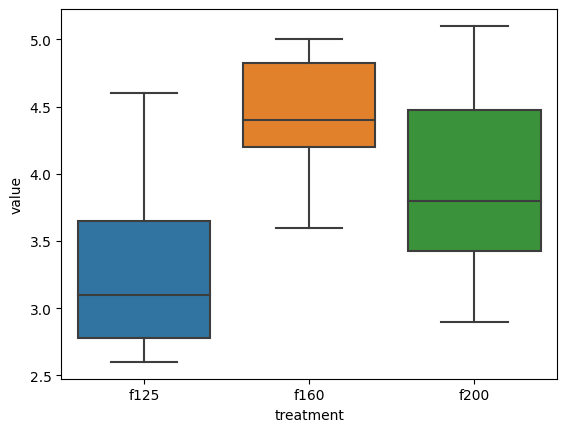

In [29]:
fig = plt.figure()
sns.boxplot(data=df_melt, x='treatment', y='value')

op het eerste oogopslag is er geen significant verschil tussen de treatments. Toch stel de nulhypothese:

H0: er is geen significant verschil tussen de treatments.

H0 toetsen voor $\alpha=0.05$

In [31]:
model = ols('value~treatment', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
treatment,3.647778,2.0,3.585627,0.053365
Residual,7.630000,15.0,NaN,NaN


In [ ]:
pvalue = anova_table["PR(>F)"]['treatment']

if pvalue < 0.05:
    print("H0 rejected")
else:
    print("H0 accepted")

H0 accepted


H0 wordt aangenomen -> er bestaat geen significant verschil tussen de treatments.

Gemiddelde van treatments en residuals berekenen

In [56]:
flow = [150, 160, 200]
mean = []

for col in df.columns:
    means = df[col].values.mean()
    mean.append(means)
means
df_melt["means"] = np.repeat(mean,6)
df_melt["residuals"] = model.resid
df_melt



3

In [55]:
sse = anova_table["sum_sq"]["Residual"]
mse = sse/n
t_crit = stats.t.ppf(q=0.975, df=15)
t_crit

lsd = t_crit*np.sqrt(2*mse/n)
lsd

1.3877175259110486

In [61]:
i = 0

while i < len(mean)-1:
    for j in range(i+1, len(mean)):
        diff= np.abs(mean[i]-mean[j])
        if diff > lsd:
            print("%i-%i: SIGNIFICANT DIFFERENCE!" %((i+1),(j+1)))
        else:
            print("%i-%i: no significant difference " %(i+1,j+1))
    i+=1

1-2: no significant difference 
1-3: no significant difference 
2-3: no significant difference 


Residual plots maken

Text(0, 0.5, 'residuals')

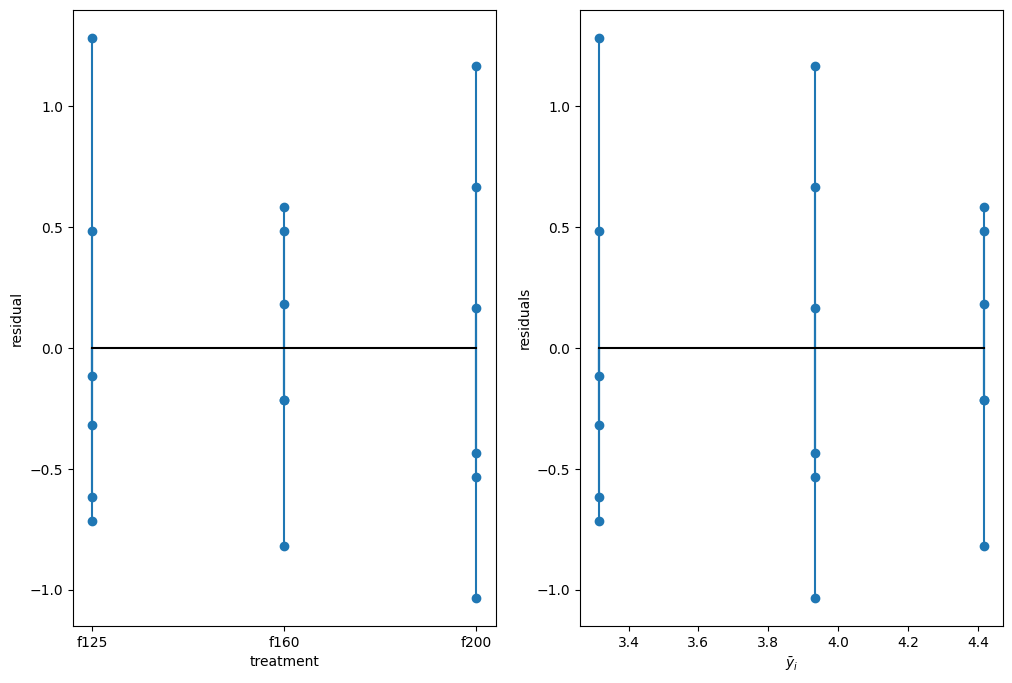

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))
ax1.stem(df_melt['treatment'], df_melt['residuals'], basefmt='k')
ax1.set_xlabel('treatment')
ax1.set_ylabel('residual')

ax2.stem(df_melt['means'], df_melt['residuals'], basefmt='k')
ax2.set_xlabel(r"$\bar{y}_i$")
ax2.set_ylabel('residuals')

zien er beide vrij random uit en volgens Lieke is dat goed iguess.

Testen op normale verdeling.

H0: data volgt een normale verdeling.

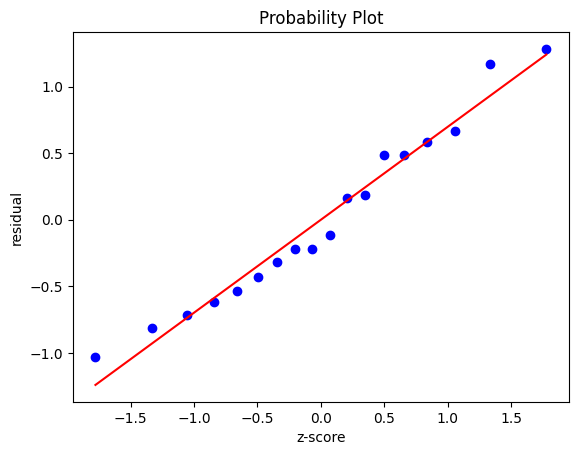

In [43]:
fig = plt.figure()
ax = stats.probplot(df_melt['residuals'], dist='norm', plot=plt)
plt.xlabel('z-score')
plt.ylabel("residual")
plt.show()

De datapunten liggen dicht op de lijn, waaruit geconcludeerd kan worden dat de data significant een normale verdeling volgt. De nulhypothese wordt dus aangenomen.